In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
from sklearn.cluster import KMeans

## Extract

In [2]:
#Import Dataset
df=pd.read_csv('../data/external/billboard_hits.csv')

## Transform

In [3]:
#show data columns
df.columns

Index(['Unnamed: 0', 'Track', 'Artist', 'Placement', 'Year', 'Month', 'Day',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [4]:
#drop Unnamed column
# df = df.drop(['Unnamed: 0'],axis=1)
# df_clean = df.sort_values('Placement').drop_duplicates('Track', keep='last')
# df['Decade'] = (10 * (df['Year'] // 10)).astype(str) + 's'
attribute_df = df[['danceability', 'energy', 'key', 'loudness', "speechiness", 'acousticness', 'liveness', 'valence', 'tempo']]
attribute_df

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.654,0.452,2.0,-9.709,0.0300,0.8350,0.1600,0.691,106.662
1,0.654,0.452,2.0,-9.709,0.0300,0.8350,0.1600,0.691,106.662
2,0.654,0.452,2.0,-9.709,0.0300,0.8350,0.1600,0.691,106.662
3,0.654,0.452,2.0,-9.709,0.0300,0.8350,0.1600,0.691,106.662
4,0.510,0.349,5.0,-8.677,0.0264,0.7620,0.1300,0.586,94.267
...,...,...,...,...,...,...,...,...,...
69900,0.721,0.716,10.0,-7.037,0.0657,0.0334,0.2370,0.667,104.994
69901,0.511,0.719,5.0,-6.261,0.1170,0.1980,0.5450,0.610,77.481
69902,0.753,0.597,8.0,-8.469,0.2920,0.0477,0.1970,0.616,76.997
69903,0.693,0.652,5.0,-8.766,0.2990,0.2500,0.0294,0.770,87.986


## Machine Learning

In [5]:
# X = sixty_df_clean[['energy']]
# y = sixty_df_clean[['loudness']]

In [6]:
lists = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(attribute_df)
    lists.append(kmeanModel.inertia_)

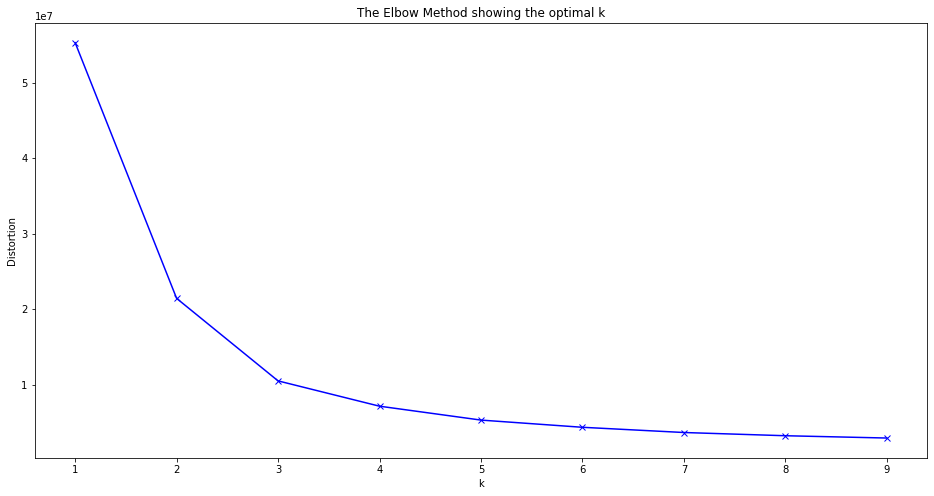

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, lists, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Without Scaling

In [12]:
# Create a kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(attribute_df)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(attribute_df)
attribute_df["Cluster"] = predicted_clusters

/Users/Kelsey/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


## Cluster Quality

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate Silhoutte Score
#
score = silhouette_score(attribute_df, kmeans.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.510


The Silouetter Score is between -1 to 1. If the value is closer to 1, the clusters are more dense and
and separated from other clusters.

In [10]:
inertia = kmeans.inertia_
print('Inertia: %.3f' % inertia)

Inertia: 10502556.028


The smaller the inertia the denser the cluster

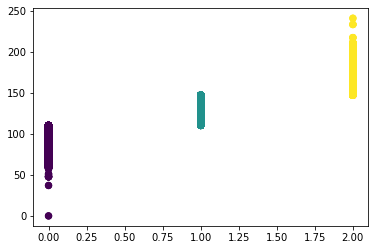

In [13]:
# Plot the clusters
plt.scatter(attribute_df['Cluster'], attribute_df['tempo'], c=attribute_df['Cluster'], s=40, cmap='viridis')
plt.show()

## With Scaling

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(attribute_df)
X_scaled_df = pd.DataFrame(scaler.fit_transform(attribute_df), columns=attribute_df.columns, index=attribute_df.index)


In [15]:
# Create a kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X_scaled)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_scaled)
X_scaled_df["Cluster"] = predicted_clusters

## Cluster Quality

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate Silhoutte Score
#
score = silhouette_score(X_scaled, kmeans.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.192


The Silouetter Score is between -1 to 1. If the value is closer to 1, the clusters are more dense and
and separated from other clusters.

In [17]:
inertia = kmeans.inertia_
print('Inertia: %.3f' % inertia)

Inertia: 22361.796


The smaller the inertia the denser the cluster

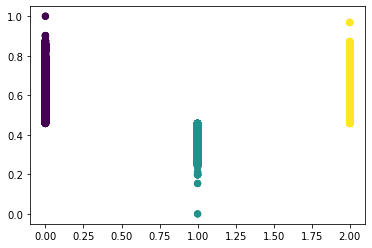

In [18]:
# Plot the clusters
plt.scatter(X_scaled_df['Cluster'], X_scaled_df['tempo'], c=X_scaled_df['Cluster'], s=40, cmap='viridis')
plt.show()

## Full Dataframe

In [40]:
df["Cluster"] = predicted_clusters
X_scaled_df["Placement"] = df["Placement"]

## Linear Regression

In [ ]:
# Assign the data to X and y

cluster_1_df = df[(attribute_df['Cluster'] == 1)]

y = cluster_1_df[['tempo']]
X = cluster_1_df[['Year']]

plt.scatter(X, y)

## Multi Linear Regression

In [ ]:
X = cluster_1_df[['Placement']]
y = cluster_1_df[['tempo']]
z = cluster_1_df[['Cluster']]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X, y, z, c=z, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

## Top Songs

In [41]:
top_20 = X_scaled_df[X_scaled_df['Placement'].between(1, 20)]
top_40 = df[df['Placement'].between(21, 40)]
top_60 = df[df['Placement'].between(41, 60)]
top_80 = df[df['Placement'].between(61, 80)]
top_100 = df[df['Placement'].between(81, 100)]

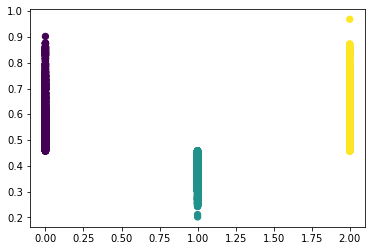

In [42]:
# Plot the clusters
plt.scatter(top_20['Cluster'], top_20['tempo'], c=top_20['Cluster'], s=40, cmap='viridis')
plt.show()

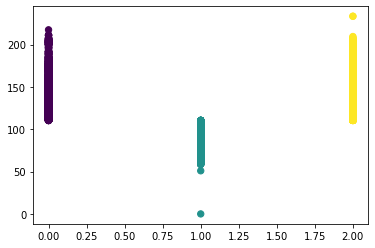

In [43]:
# Plot the clusters
plt.scatter(top_40['Cluster'], top_40['tempo'], c=top_40['Cluster'], s=40, cmap='viridis')
plt.show()

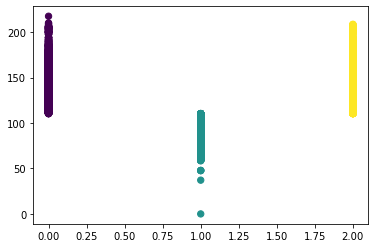

In [44]:
# Plot the clusters
plt.scatter(top_60['Cluster'], top_60['tempo'], c=top_60['Cluster'], s=40, cmap='viridis')
plt.show()

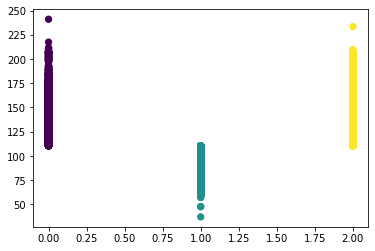

In [24]:
# Plot the clusters
plt.scatter(top_80['Cluster'], top_80['tempo'], c=top_80['Cluster'], s=40, cmap='viridis')
plt.show()

In [25]:
## Decades
df['Decade'] = (10 * (df['Year'] // 10)).astype(str) + 's'

In [26]:
# decades dataframe only take highest placement
sixty_df = df[(df['Decade'] == '1960s')]
seventy_df = df[(df['Decade'] == '1970s')]
eighty_df = df[(df['Decade'] == '1980s')]
ninety_df = df[(df['Decade'] == '1990s')]
twoth_df = df[(df['Decade'] == '2000s')]
twotn_df = df[(df['Decade'] == '2010s')]

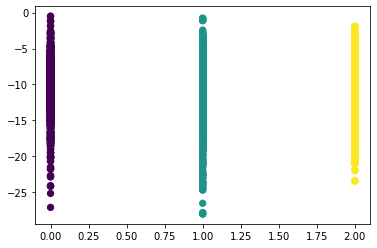

In [27]:
plt.scatter(sixty_df['Cluster'], sixty_df['loudness'], c=sixty_df['Cluster'], s=40, cmap='viridis')
plt.show()

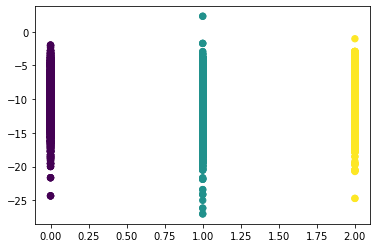

In [28]:
plt.scatter(seventy_df['Cluster'], seventy_df['loudness'], c=seventy_df['Cluster'], s=40, cmap='viridis')
plt.show()

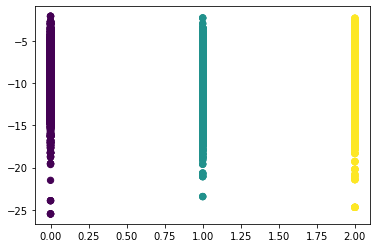

In [29]:
plt.scatter(eighty_df['Cluster'], eighty_df['loudness'], c=eighty_df['Cluster'], s=40, cmap='viridis')
plt.show()

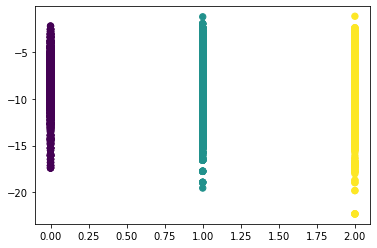

In [30]:
plt.scatter(ninety_df['Cluster'], ninety_df['loudness'], c=ninety_df['Cluster'], s=40, cmap='viridis')
plt.show()

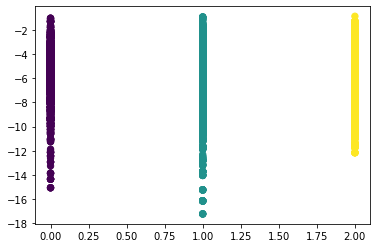

In [31]:
plt.scatter(twoth_df['Cluster'], twoth_df['loudness'], c=twoth_df['Cluster'], s=40, cmap='viridis')
plt.show()

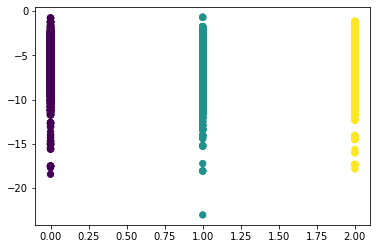

In [32]:
plt.scatter(twotn_df['Cluster'], twotn_df['loudness'], c=twotn_df['Cluster'], s=40, cmap='viridis')
plt.show()

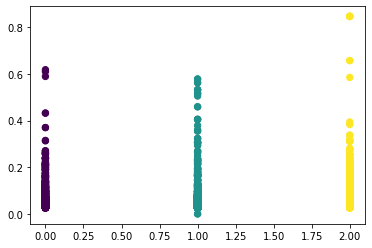

In [33]:
plt.scatter(sixty_df['Cluster'], sixty_df['speechiness'], c=sixty_df['Cluster'], s=40, cmap='viridis')
plt.show()

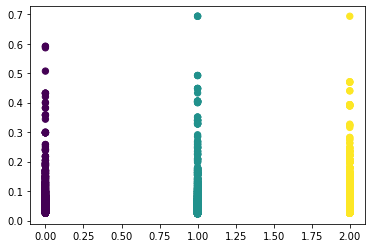

In [34]:
plt.scatter(seventy_df['Cluster'], seventy_df['speechiness'], c=seventy_df['Cluster'], s=40, cmap='viridis')
plt.show()

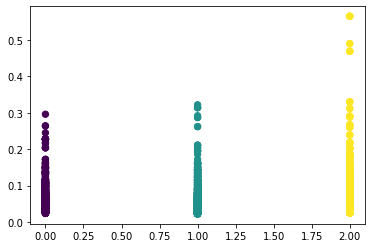

In [35]:
plt.scatter(eighty_df['Cluster'], eighty_df['speechiness'], c=eighty_df['Cluster'], s=40, cmap='viridis')
plt.show()

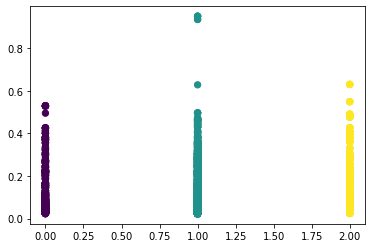

In [36]:
plt.scatter(ninety_df['Cluster'], ninety_df['speechiness'], c=ninety_df['Cluster'], s=40, cmap='viridis')
plt.show()

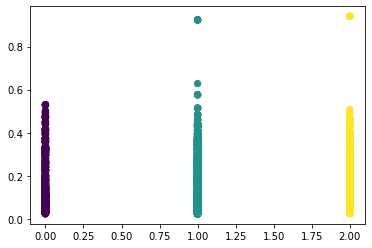

In [37]:
plt.scatter(twoth_df['Cluster'], twoth_df['speechiness'], c=twoth_df['Cluster'], s=40, cmap='viridis')
plt.show()

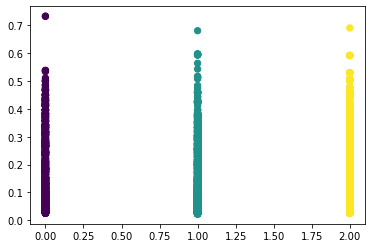

In [38]:
plt.scatter(twotn_df['Cluster'], twotn_df['speechiness'], c=twotn_df['Cluster'], s=40, cmap='viridis')
plt.show()